## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools

train, test = keras.datasets.cifar10.load_data()

## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

Using TensorFlow backend.


In [2]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [3]:
from keras.layers import Dense, Dropout
def build_mlp(input_shape, output_units=10, num_neurons=[512, 128, 32], drop_ratio=0.3):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drop_ratio)(x)
        else:
            x = Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
            x = Dropout(drop_ratio)(x)
    
    out = Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

## 1.請比較使用不同層數以及不同 Dropout rate 對訓練的效果

In [4]:
## 超參數設定
"""
Set your hyper-parameters
"""
epochs = 50
batch_size = 256
num_neurons = {'3': [512, 128, 32], '5': [512, 256, 128, 64, 32]}
drop_ratio = [0.0, 0.3, 0.6]

In [5]:
results = {}
"""
Set your training loop
"""
for nn in num_neurons:
    for dr in drop_ratio:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print(f'num_neurons = {nn}, drop_ratio = {dr}')
        model = build_mlp(input_shape=x_train.shape[1:], num_neurons=num_neurons[nn], drop_ratio=dr)
        model.summary()
        optimizer = keras.optimizers.SGD(lr=0.01, nesterov=True, momentum=0.9)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        name_tag = f'num_neurons = {nn}, drop_ratio = {dr}'
        results[name_tag] = {'train-loss': train_loss, 'valid-loss': valid_loss, 
                             'train-acc': train_acc, 'valid-acc': valid_acc}

num_neurons = 3, drop_ratio = 0.0
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32)                4128      
____________________________________

50000/50000 [==============================] - 6s 114us/step - loss: 0.6537 - acc: 0.7659 - val_loss: 1.7290 - val_acc: 0.5167
Epoch 46/50
50000/50000 [==============================] - 6s 114us/step - loss: 0.6431 - acc: 0.7695 - val_loss: 1.8082 - val_acc: 0.4984
Epoch 47/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.6351 - acc: 0.7736 - val_loss: 1.6733 - val_acc: 0.5158
Epoch 48/50
50000/50000 [==============================] - 6s 115us/step - loss: 0.6064 - acc: 0.7831 - val_loss: 1.8732 - val_acc: 0.4998
Epoch 49/50
50000/50000 [==============================] - 6s 114us/step - loss: 0.5995 - acc: 0.7855 - val_loss: 1.7637 - val_acc: 0.5301
Epoch 50/50
50000/50000 [==============================] - 6s 121us/step - loss: 0.5775 - acc: 0.7949 - val_loss: 1.8374 - val_acc: 0.5148
num_neurons = 3, drop_ratio = 0.3
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_____________________________

Epoch 41/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.4212 - acc: 0.4943 - val_loss: 1.3708 - val_acc: 0.5125
Epoch 42/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.4215 - acc: 0.4990 - val_loss: 1.3803 - val_acc: 0.5028
Epoch 43/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.4106 - acc: 0.4987 - val_loss: 1.3735 - val_acc: 0.5120
Epoch 44/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.4045 - acc: 0.5035 - val_loss: 1.3529 - val_acc: 0.5184
Epoch 45/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.4007 - acc: 0.5063 - val_loss: 1.3808 - val_acc: 0.5104
Epoch 46/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.3995 - acc: 0.5022 - val_loss: 1.3791 - val_acc: 0.5141
Epoch 47/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.3924 - acc: 0.5086 - val_loss: 1.3483 - val_acc: 0.5190
Epoch 48/50
50000/50000 [==

50000/50000 [==============================] - 6s 127us/step - loss: 1.9451 - acc: 0.2550 - val_loss: 1.9123 - val_acc: 0.2786
Epoch 40/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.9428 - acc: 0.2578 - val_loss: 1.9298 - val_acc: 0.2752
Epoch 41/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.9356 - acc: 0.2576 - val_loss: 1.9189 - val_acc: 0.2936
Epoch 42/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.9326 - acc: 0.2608 - val_loss: 1.8845 - val_acc: 0.2993
Epoch 43/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.9317 - acc: 0.2634 - val_loss: 1.9004 - val_acc: 0.2793
Epoch 44/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.9232 - acc: 0.2625 - val_loss: 1.9013 - val_acc: 0.2908
Epoch 45/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.9286 - acc: 0.2628 - val_loss: 1.8799 - val_acc: 0.3070
Epoch 46/50
50000/50000 [=================

Epoch 34/50
50000/50000 [==============================] - 6s 114us/step - loss: 0.7390 - acc: 0.7366 - val_loss: 1.6295 - val_acc: 0.5205
Epoch 35/50
50000/50000 [==============================] - 6s 115us/step - loss: 0.7266 - acc: 0.7396 - val_loss: 1.6013 - val_acc: 0.5235
Epoch 36/50
50000/50000 [==============================] - 6s 112us/step - loss: 0.7187 - acc: 0.7426 - val_loss: 1.6494 - val_acc: 0.5215
Epoch 37/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.6903 - acc: 0.7546 - val_loss: 1.6368 - val_acc: 0.5288
Epoch 38/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.6689 - acc: 0.7589 - val_loss: 1.7712 - val_acc: 0.4996
Epoch 39/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.6515 - acc: 0.7669 - val_loss: 1.7087 - val_acc: 0.5197
Epoch 40/50
50000/50000 [==============================] - 6s 114us/step - loss: 0.6318 - acc: 0.7734 - val_loss: 1.7623 - val_acc: 0.5328
Epoch 41/50
50000/50000 [==

50000/50000 [==============================] - 6s 119us/step - loss: 1.6221 - acc: 0.4219 - val_loss: 1.5296 - val_acc: 0.4555
Epoch 29/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.6167 - acc: 0.4219 - val_loss: 1.5134 - val_acc: 0.4598
Epoch 30/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.6105 - acc: 0.4232 - val_loss: 1.5963 - val_acc: 0.4445
Epoch 31/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.6032 - acc: 0.4269 - val_loss: 1.5063 - val_acc: 0.4586
Epoch 32/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.5958 - acc: 0.4271 - val_loss: 1.4907 - val_acc: 0.4692
Epoch 33/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.5922 - acc: 0.4323 - val_loss: 1.5071 - val_acc: 0.4642
Epoch 34/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.5891 - acc: 0.4318 - val_loss: 1.4821 - val_acc: 0.4742
Epoch 35/50
50000/50000 [==============

50000/50000 [==============================] - 7s 136us/step - loss: 2.1107 - acc: 0.1688 - val_loss: 2.3274 - val_acc: 0.1040
Epoch 23/50
50000/50000 [==============================] - 7s 138us/step - loss: 2.1127 - acc: 0.1685 - val_loss: 2.2918 - val_acc: 0.1105
Epoch 24/50
50000/50000 [==============================] - 7s 140us/step - loss: 2.0996 - acc: 0.1688 - val_loss: 2.3145 - val_acc: 0.1061
Epoch 25/50
50000/50000 [==============================] - 7s 138us/step - loss: 2.1047 - acc: 0.1695 - val_loss: 2.3125 - val_acc: 0.1070
Epoch 26/50
50000/50000 [==============================] - 7s 136us/step - loss: 2.1008 - acc: 0.1682 - val_loss: 2.2986 - val_acc: 0.1075
Epoch 27/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.1042 - acc: 0.1684 - val_loss: 2.2916 - val_acc: 0.1090
Epoch 28/50
50000/50000 [==============================] - 7s 133us/step - loss: 2.0983 - acc: 0.1704 - val_loss: 2.3116 - val_acc: 0.1077
Epoch 29/50
50000/50000 [==============

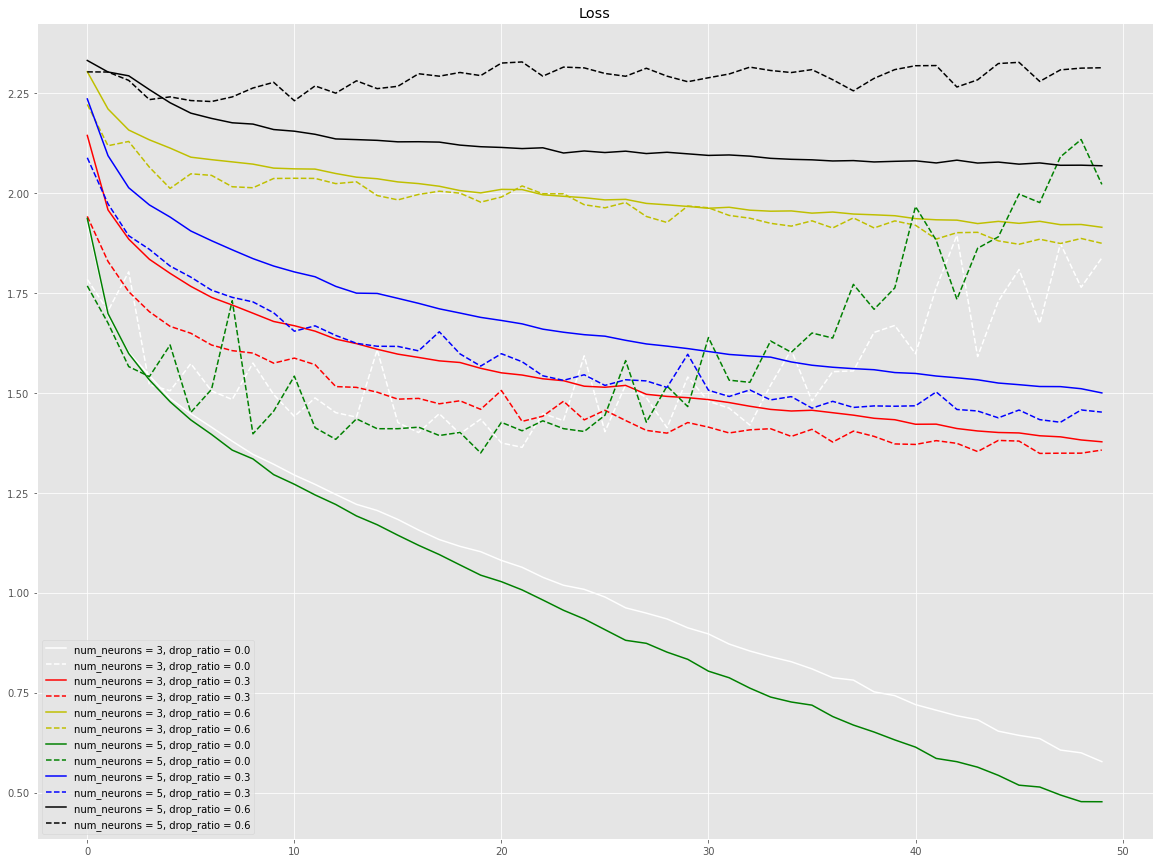

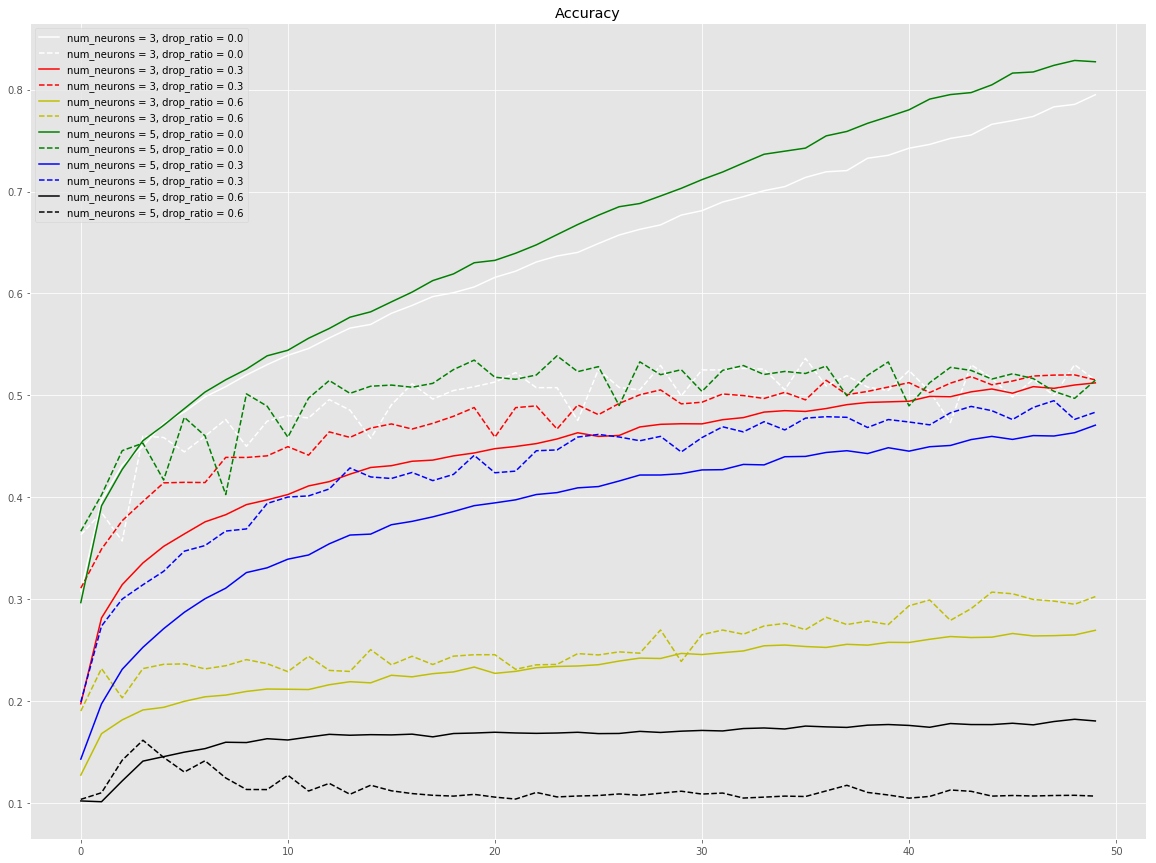

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
"""
plot the results
"""
plt.style.use('ggplot')
color_bar = ['w', 'r', 'y', 'g', 'b', 'k']

plt.figure(figsize=(20, 15))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(20, 15))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## 2.將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [7]:
## 超參數設定
"""
Set your hyper-parameters
"""
epochs = 50
batch_size = 256
num_neurons = {'3': [512, 128, 32], '5': [512, 256, 128, 64, 32]}
drop_ratio = [0.0, 0.3]

In [8]:
results = {}
"""
Set your training loop
"""
for nn in num_neurons:
    for dr in drop_ratio:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print(f'num_neurons = {nn}, drop_ratio = {dr}')
        model = build_mlp(input_shape=x_train.shape[1:], num_neurons=num_neurons[nn], drop_ratio=dr)
        model.summary()
        optimizer = keras.optimizers.Adam()
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        name_tag = f'num_neurons = {nn}, drop_ratio = {dr}'
        results[name_tag] = {'train-loss': train_loss, 'valid-loss': valid_loss, 
                             'train-acc': train_acc, 'valid-acc': valid_acc}

num_neurons = 3, drop_ratio = 0.0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32)                4128      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)   

50000/50000 [==============================] - 6s 120us/step - loss: 2.3027 - acc: 0.0976 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 7s 134us/step - loss: 2.3027 - acc: 0.0985 - val_loss: 2.3026 - val_acc: 0.1000
num_neurons = 3, drop_ratio = 0.3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)

50000/50000 [==============================] - 6s 123us/step - loss: 1.6429 - acc: 0.4142 - val_loss: 1.5481 - val_acc: 0.4586
Epoch 48/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.6372 - acc: 0.4163 - val_loss: 1.5385 - val_acc: 0.4580
Epoch 49/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.6309 - acc: 0.4162 - val_loss: 1.5477 - val_acc: 0.4565
Epoch 50/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.6352 - acc: 0.4141 - val_loss: 1.5445 - val_acc: 0.4541
num_neurons = 5, drop_ratio = 0.0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)       

50000/50000 [==============================] - 6s 126us/step - loss: 0.7920 - acc: 0.7148 - val_loss: 1.5875 - val_acc: 0.5189
Epoch 42/50
50000/50000 [==============================] - 6s 129us/step - loss: 0.7706 - acc: 0.7208 - val_loss: 1.6056 - val_acc: 0.5225
Epoch 43/50
50000/50000 [==============================] - 6s 129us/step - loss: 0.7613 - acc: 0.7241 - val_loss: 1.6383 - val_acc: 0.5213
Epoch 44/50
50000/50000 [==============================] - 6s 125us/step - loss: 0.7434 - acc: 0.7329 - val_loss: 1.6161 - val_acc: 0.5277
Epoch 45/50
50000/50000 [==============================] - 7s 144us/step - loss: 0.7204 - acc: 0.7396 - val_loss: 1.7154 - val_acc: 0.5187
Epoch 46/50
50000/50000 [==============================] - 7s 142us/step - loss: 0.7115 - acc: 0.7447 - val_loss: 1.6610 - val_acc: 0.5288
Epoch 47/50
50000/50000 [==============================] - 7s 145us/step - loss: 0.7012 - acc: 0.7465 - val_loss: 1.7033 - val_acc: 0.5252
Epoch 48/50
50000/50000 [==============

50000/50000 [==============================] - 7s 146us/step - loss: 1.8571 - acc: 0.3054 - val_loss: 1.8080 - val_acc: 0.3315
Epoch 36/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.8602 - acc: 0.3048 - val_loss: 1.8281 - val_acc: 0.3290
Epoch 37/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.8536 - acc: 0.3092 - val_loss: 1.7934 - val_acc: 0.3423
Epoch 38/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.8469 - acc: 0.3114 - val_loss: 1.8410 - val_acc: 0.3287
Epoch 39/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.8607 - acc: 0.3070 - val_loss: 1.8122 - val_acc: 0.3303
Epoch 40/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.8436 - acc: 0.3142 - val_loss: 1.7864 - val_acc: 0.3440
Epoch 41/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.8485 - acc: 0.3089 - val_loss: 1.7924 - val_acc: 0.3436
Epoch 42/50
50000/50000 [==============

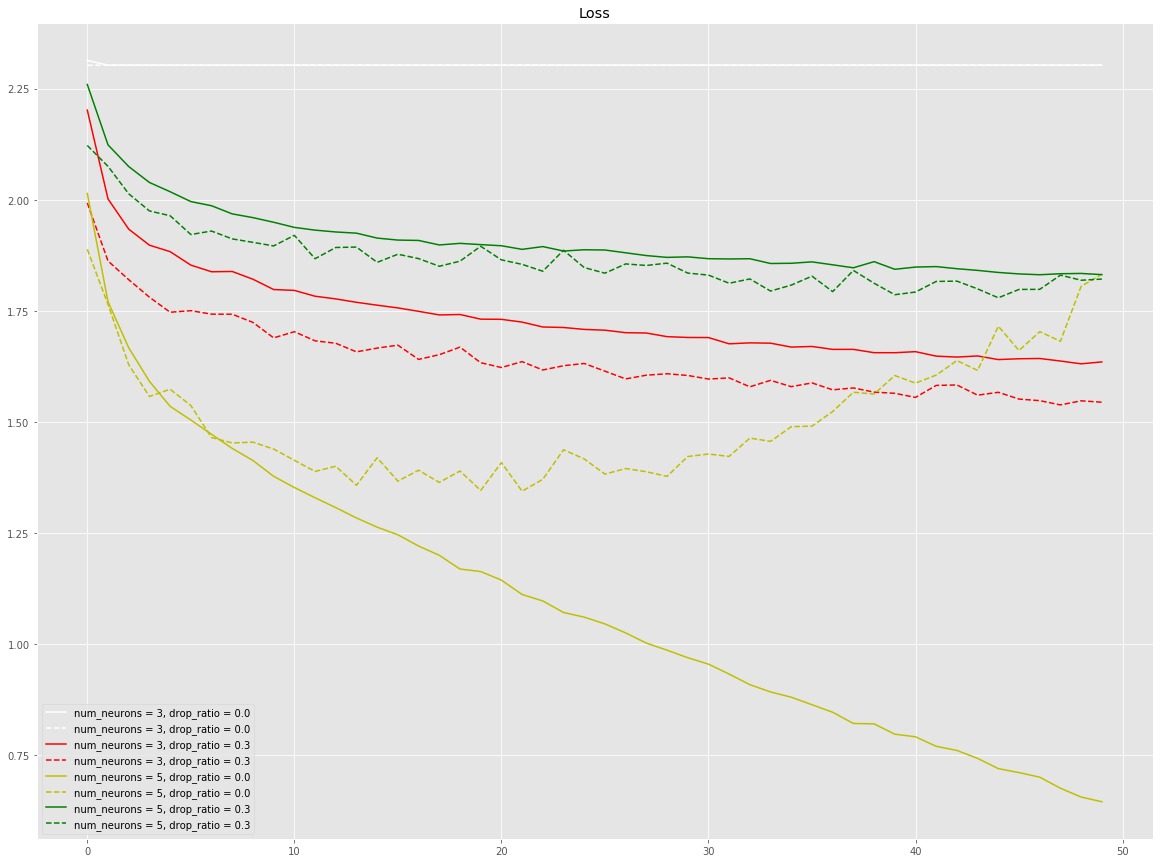

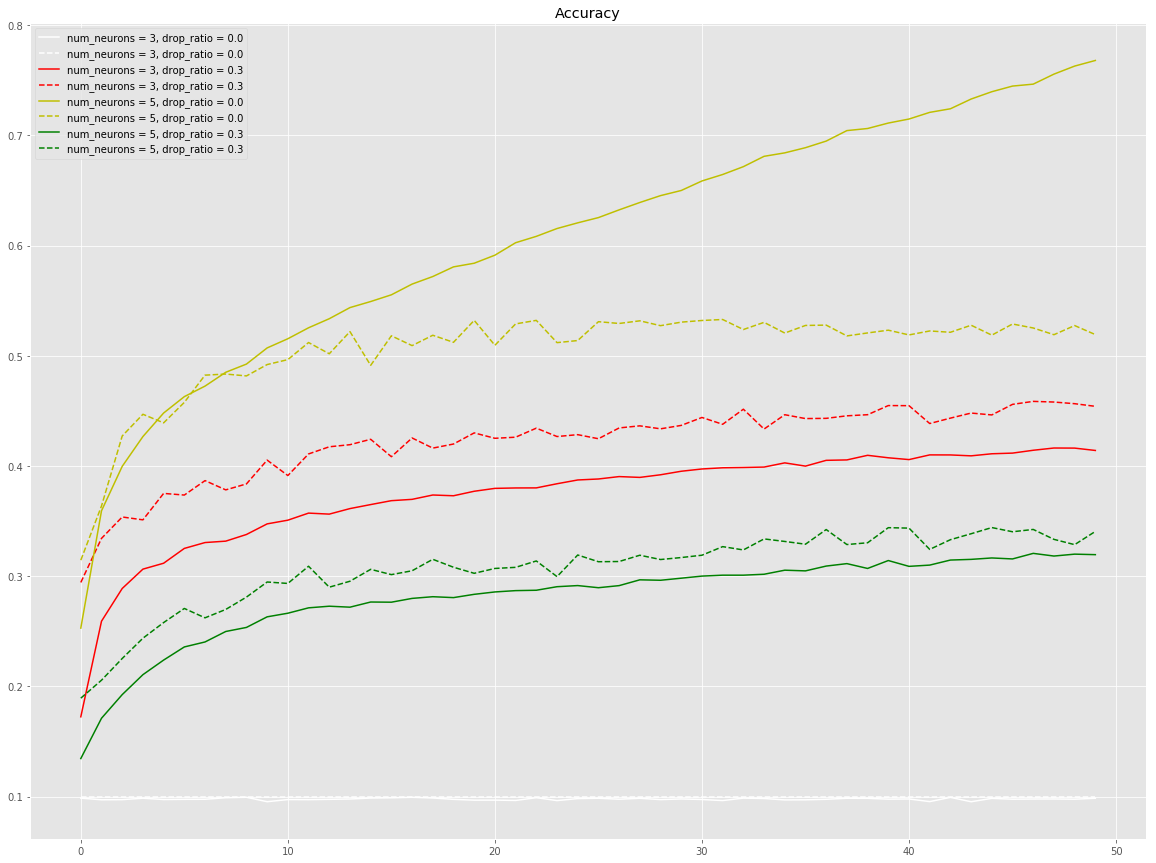

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""
plot the results
"""
plt.style.use('ggplot')
color_bar = ['w', 'r', 'y', 'g']

plt.figure(figsize=(20, 15))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(20, 15))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()